# Higgs Boson - Collision event classification

## Data exploration


### Download data set

Following cell will download the original data set and uncompress it in the `data/` directory.

The data set is published on the UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/HIGGS).

In [ ]:
#!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz
#!mv HIGGS.csv.gz ../data/

data_dir = '../data'
data_file = data_dir + '/HIGGS.csv.gz'

NROWS = None

During initial data exploration, a subset of the data will be loaded.

In [ ]:
NROWS = 1_000_000

### Reading the data set



In [3]:
!pip install joblib sweetviz

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p36/bin/python -m pip install --upgrade pip' command.


In [4]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, RobustScaler, QuantileTransformer, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import joblib

import os
import boto3
import sagemaker

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
column_names = ['label',
          'lepton_pt', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude', 'missing_energy_phi',
          'jet_1_pt', 'jet_1_eta', 'jet_1_phi', 'jet_1_b-tag',
          'jet_2_pt', 'jet_2_eta', 'jet_2_phi', 'jet_2_b-tag',
          'jet_3_pt', 'jet_3_eta', 'jet_3_phi', 'jet_3_b-tag',
          'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_b-tag',
          'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'
         ]

# Create list containing the low and high level columns.
low_level_columns = column_names[1:22]
high_level_columns = column_names[22:]

higgs_df = pd.read_csv(data_file, header=None, names=column_names, compression='gzip', nrows=NROWS)

(rows, columns) = higgs_df.shape
print("The data set has {} rows and {} columns".format(rows, columns))

The data set has 1000000 rows and 29 columns


---

## Explore the data set

In [6]:
columns_part1 = column_names[:15]
columns_part2 = column_names[15:]

display(higgs_df[columns_part1].head(10))
display(higgs_df[columns_part2].head(10))

,label,lepton_pt,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b-tag,jet_2_pt,jet_2_eta,jet_2_phi,jet_2_b-tag,jet_3_pt
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,1.374992,-0.653674,0.930349,1.107436,1.138904
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,-0.213642,1.271015,2.214872,0.499994
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,1.540659,-0.819690,2.214872,0.993490
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,-0.676016,0.736159,2.214872,1.298720
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,1.020974,0.971407,2.214872,0.596761
5,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,0.755421,0.643110,1.426367,0.000000,0.921661
6,1.0,0.409391,-1.884684,-1.027292,1.672452,-1.604598,1.338015,0.055427,0.013466,2.173076,0.509783,-1.038338,0.707862,0.000000,0.746918
7,1.0,0.933895,0.629130,0.527535,0.238033,-0.966569,0.547811,-0.059439,-1.706866,2.173076,0.941003,-2.653733,-0.157220,0.000000,1.030370
8,1.0,1.405144,0.536603,0.689554,1.179567,-0.110061,3.202405,-1.526960,-1.576033,0.000000,2.931537,0.567342,-0.130033,2.214872,1.787123
9,1.0,1.176566,0.104161,1.397002,0.479721,0.265513,1.135563,1.534831,-0.253291,0.000000,1.027247,0.534316,1.180022,0.000000,2.405661


,jet_3_eta,jet_3_phi,jet_3_b-tag,jet_4_pt,jet_4_eta,jet_4_phi,jet_4_b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,-1.578198,-1.046985,0.000000,0.657930,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,-1.261432,0.732156,0.000000,0.398701,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,0.356080,-0.208778,2.548224,1.256955,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,-1.430738,-0.364658,0.000000,0.745313,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,-0.350273,0.631194,0.000000,0.479999,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
5,-1.190432,-1.615589,0.000000,0.651114,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818
6,-0.358465,-1.646654,0.000000,0.367058,0.069496,1.377130,3.101961,0.869418,1.222083,1.000627,0.545045,0.698653,0.977314,0.828786
7,-0.175505,0.523021,2.548224,1.373547,1.291248,-1.467454,0.000000,0.901837,1.083671,0.979696,0.783300,0.849195,0.894356,0.774879
8,0.899499,0.585151,2.548224,0.401865,-0.151202,1.163489,0.000000,1.667071,4.039273,1.175828,1.045352,1.542972,3.534827,2.740754
9,0.087557,-0.976534,2.548224,1.250383,0.268541,0.530334,0.000000,0.833175,0.773968,0.985750,1.103696,0.849140,0.937104,0.812364


In [7]:
# Convert label to integer
higgs_df['label'] = higgs_df['label'].astype(int)

In [8]:
# Seperate labels (dependent feature) and independent features.
columns_to_drop = ['label'] + high_level_columns

higgs_y = higgs_df['label']
higgs_X = higgs_df.drop(columns=columns_to_drop)

In [9]:
# Display first rows
higgs_X.head()

,lepton_pt,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b-tag,jet_2_pt,...,jet_2_phi,jet_2_b-tag,jet_3_pt,jet_3_eta,jet_3_phi,jet_3_b-tag,jet_4_pt,jet_4_eta,jet_4_phi,jet_4_b-tag
0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,1.374992,...,0.930349,1.107436,1.138904,-1.578198,-1.046985,0.000000,0.657930,-0.010455,-0.045767,3.101961
1,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,...,1.271015,2.214872,0.499994,-1.261432,0.732156,0.000000,0.398701,-1.138930,-0.000819,0.000000
2,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,...,-0.819690,2.214872,0.993490,0.356080,-0.208778,2.548224,1.256955,1.128848,0.900461,0.000000
3,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,...,0.736159,2.214872,1.298720,-1.430738,-0.364658,0.000000,0.745313,-0.678379,-1.360356,0.000000
4,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,...,0.971407,2.214872,0.596761,-0.350273,0.631194,0.000000,0.479999,-0.373566,0.113041,0.000000


In [10]:
higgs_y.head()

0    1
1    1
2    1
3    0
4    1
Name: label, dtype: int64

In [11]:
# Show the entire first event
higgs_X.iloc[0]

lepton_pt                   0.869293
lepton_eta                 -0.635082
lepton_phi                  0.225690
missing_energy_magnitude    0.327470
missing_energy_phi         -0.689993
jet_1_pt                    0.754202
jet_1_eta                  -0.248573
jet_1_phi                  -1.092064
jet_1_b-tag                 0.000000
jet_2_pt                    1.374992
jet_2_eta                  -0.653674
jet_2_phi                   0.930349
jet_2_b-tag                 1.107436
jet_3_pt                    1.138904
jet_3_eta                  -1.578198
jet_3_phi                  -1.046985
jet_3_b-tag                 0.000000
jet_4_pt                    0.657930
jet_4_eta                  -0.010455
jet_4_phi                  -0.045767
jet_4_b-tag                 3.101961
Name: 0, dtype: float64

---

**Dependent features**

First looking at how well the data set is balanced.

In [12]:
# Data set balanced?
higgs_y.value_counts()

1    529673
0    470327
Name: label, dtype: int64

The data set is quite well balanced. Of the 500000 rows, 52.94% are signals and 47.06% are background.

---

**Independent features**

Let's analyze the low-level and high-level features of the data set.

In [13]:
# Any missing values?
missing_values = higgs_X.isnull().values.any()
if not missing_values:
    print("The data set has no missing values.")

The data set has no missing values.


In [14]:
# What types are each of the features?
higgs_X.dtypes

lepton_pt                   float64
lepton_eta                  float64
lepton_phi                  float64
missing_energy_magnitude    float64
missing_energy_phi          float64
jet_1_pt                    float64
jet_1_eta                   float64
jet_1_phi                   float64
jet_1_b-tag                 float64
jet_2_pt                    float64
jet_2_eta                   float64
jet_2_phi                   float64
jet_2_b-tag                 float64
jet_3_pt                    float64
jet_3_eta                   float64
jet_3_phi                   float64
jet_3_b-tag                 float64
jet_4_pt                    float64
jet_4_eta                   float64
jet_4_phi                   float64
jet_4_b-tag                 float64
dtype: object

All features are float. From data set description we know none of these are categorical --> Only numerical features.

In [15]:
# Check statistics of the features
higgs_X.describe()

,lepton_pt,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b-tag,jet_2_pt,...,jet_2_phi,jet_2_b-tag,jet_3_pt,jet_3_eta,jet_3_phi,jet_3_b-tag,jet_4_pt,jet_4_eta,jet_4_phi,jet_4_b-tag
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.991592,0.000489,-0.000953,0.998150,-0.000573,0.990564,-0.000824,0.000549,1.000192,0.993076,...,0.000383,1.000669,0.992230,0.001477,0.000043,0.999211,0.985936,-0.000375,-0.001725,0.998231
std,0.565099,1.008276,1.005810,0.599151,1.006808,0.475070,1.010368,1.006224,1.027716,0.500112,...,1.006868,1.049254,0.486516,1.008237,1.005647,1.193629,0.505769,1.007789,1.005672,1.399478
min,0.274697,-2.434976,-1.742508,0.000626,-1.743944,0.138602,-2.969725,-1.741237,0.000000,0.188981,...,-1.742372,0.000000,0.263608,-2.729663,-1.742069,0.000000,0.365354,-2.497265,-1.742691,0.000000
25%,0.590753,-0.737349,-0.871931,0.576455,-0.871791,0.678535,-0.689225,-0.867542,0.000000,0.657090,...,-0.870734,0.000000,0.651204,-0.697078,-0.870580,0.000000,0.617281,-0.714190,-0.872034,0.000000
50%,0.853737,0.000920,0.000417,0.891644,-0.000800,0.894178,-0.001016,0.000715,1.086538,0.890641,...,0.000454,0.000000,0.897601,0.001993,-0.000197,0.000000,0.867990,0.000372,-0.005259,0.000000
75%,1.236958,0.738214,0.868775,1.293112,0.871773,1.170649,0.687194,0.869976,2.173076,1.202001,...,0.872092,2.214872,1.222149,0.701975,0.870285,2.548224,1.221660,0.714934,0.868831,3.101961
max,8.711782,2.434868,1.743236,9.900929,1.743257,8.382610,2.969674,1.741454,2.173076,11.647081,...,1.743175,2.214872,8.864838,2.730009,1.742884,2.548224,11.621231,2.498009,1.743372,3.101961


Now we split the data set into 1 DataFrame for each label.

In [16]:
signal_X = higgs_X[higgs_df['label'] == 1]
background_X = higgs_X[higgs_df['label'] == 0]

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


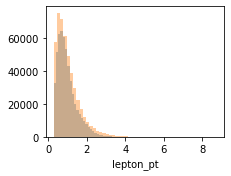

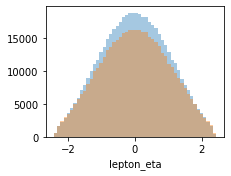

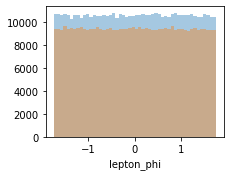

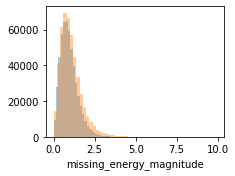

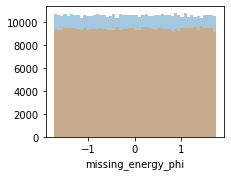

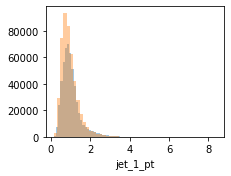

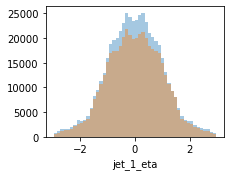

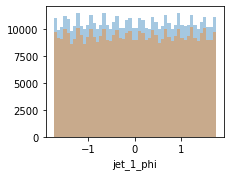

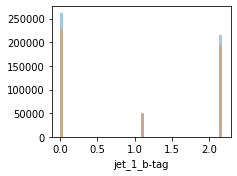

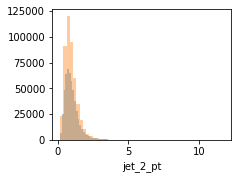

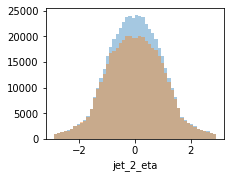

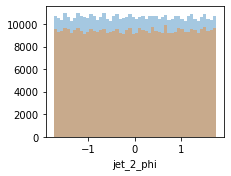

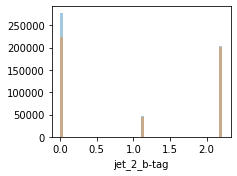

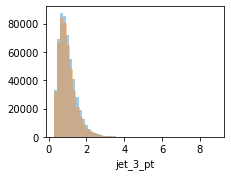

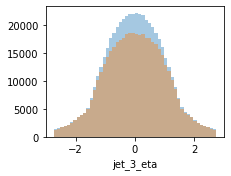

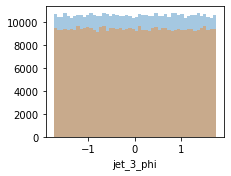

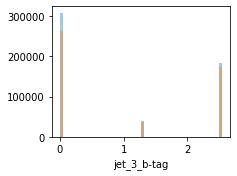

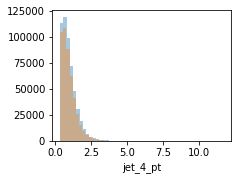

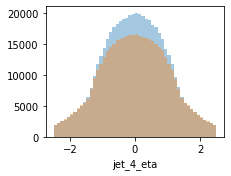

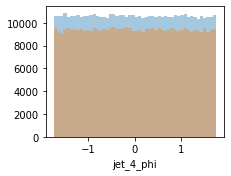

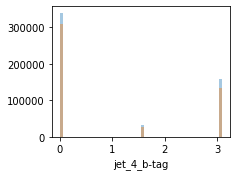

In [17]:
for col in higgs_X.columns:
    plt.figure(figsize=(3.2, 2.4))
    sns.distplot(signal_X[col], kde=False, bins=50)
    sns.distplot(background_X[col], kde=False, bins=50)
    plt.savefig("{}/{}_{}.png".format(NROWS, NROWS, col))

**Discussion about the features**

In the low-level features we can see a few different patterns emerging.

* Each of the `b-tag`features appear to have 3 possible values: the minimum (0), the maximum (+/- 2.2, +/- 2.5 or +/- 3.1) and roughly the middle between minimum and maximum.
* `eta` feature have a normal distribution centered around 0 with min and max around -3 and 3.
* `phi` features have similar minimum (-1.7) and max (1.7) values with a uniform distribution of measurements in between.
* `pt` features follow a Fisher (F) distribution with values ranging from 0 to 7.

None of the high-level features follow a normal distribution. All of these have outliers.

The ranges of possible values for the different features do not match, so we must apply feature scaling. There are 2 frequently used strategies: normalization and standardization.

* Normalization will rescale a feature to values between 0 and 1.
* Standardization will rescales the feature in such a way that the mean becomes 0 with a standard deviation of 1.

We'll use standardization.

The `pt` low-level features and high-level features are skewed. A `PowerTransformer` will be applied to bring them closer to a normal distribution.

The `phi` features follow a uniform distribution, which means that it likely doesn't contain much information to distinguish between signal and background events. For this reason these features will be removed.

---

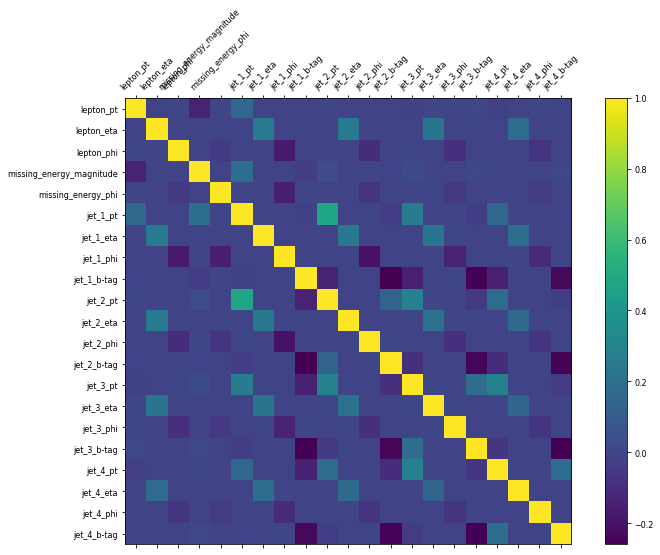

In [18]:
f = plt.figure(figsize=(12, 8))
plt.matshow(higgs_X.corr(), fignum=f.number)
plt.xticks(range(higgs_X.shape[1]), higgs_X.columns, fontsize=8, rotation=45)
plt.yticks(range(higgs_X.shape[1]), higgs_X.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.savefig("{}/correlation.png".format(NROWS))

In [19]:
higgs_X.corr()*100

,lepton_pt,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b-tag,jet_2_pt,...,jet_2_phi,jet_2_b-tag,jet_3_pt,jet_3_eta,jet_3_phi,jet_3_b-tag,jet_4_pt,jet_4_eta,jet_4_phi,jet_4_b-tag
lepton_pt,100.000000,-0.041228,0.149049,-14.149602,0.166378,16.625885,0.022195,-0.146867,-0.503362,0.503951,...,-0.029993,-0.587312,-1.235502,0.098641,0.104999,0.592047,-1.926109,-0.240070,0.104188,0.066429
lepton_eta,-0.041228,100.000000,-0.058648,0.009682,-0.002404,0.001671,26.563824,0.041959,-0.125054,-0.023041,...,-0.139003,-0.137277,-0.067581,22.652034,-0.018794,0.144295,0.026675,17.902264,0.037761,0.083193
lepton_phi,0.149049,-0.058648,100.000000,-0.103607,-4.528843,-0.025899,-0.109784,-16.774880,-0.087730,-0.021045,...,-9.335716,-0.030755,0.112016,-0.012717,-8.405073,0.030543,0.032326,-0.094848,-6.356573,0.020972
missing_energy_magnitude,-14.149602,0.009682,-0.103607,100.000000,-0.114097,19.725102,-0.102292,0.072056,-2.926912,3.782917,...,0.162892,-0.776326,2.147788,-0.072307,-0.129894,1.164034,0.369125,-0.007796,-0.061045,0.851252
missing_energy_phi,0.166378,-0.002404,-4.528843,-0.114097,100.000000,-0.135934,-0.201194,-15.452145,0.113230,-0.080401,...,-6.497125,-0.044949,-0.045029,-0.055046,-5.196095,-0.061475,-0.093817,-0.105416,-3.878155,-0.066813
jet_1_pt,16.625885,0.001671,-0.025899,19.725102,-0.135934,100.000000,-0.068042,-0.001396,-1.566261,48.781663,...,0.138952,-3.213898,26.840015,0.046889,0.041737,-2.531994,16.315098,-0.082104,-0.056764,-0.706351
jet_1_eta,0.022195,26.563824,-0.109784,-0.102292,-0.201194,-0.068042,100.000000,0.067695,0.063833,-0.067437,...,-0.035816,-0.025662,-0.085805,23.033352,0.155042,0.056327,-0.045619,19.261431,-0.104005,0.052837
jet_1_phi,-0.146867,0.041959,-16.774880,0.072056,-15.452145,-0.001396,0.067695,100.000000,0.004586,-0.196272,...,-19.850120,0.022306,0.041145,0.118089,-13.241819,-0.137546,-0.129246,0.119667,-10.249223,0.102478
jet_1_b-tag,-0.503362,-0.125054,-0.087730,-2.926912,0.113230,-1.566261,0.063833,0.004586,100.000000,-13.545910,...,-0.200581,-26.002752,-14.840434,-0.121840,0.192874,-25.501375,-14.750152,-0.100385,-0.049338,-23.450044
jet_2_pt,0.503951,-0.023041,-0.021045,3.782917,-0.080401,48.781663,-0.067437,-0.196272,-13.545910,100.000000,...,0.067619,14.093516,29.273896,0.104891,0.013664,-4.708504,18.578950,0.010145,0.022797,-2.807485


In [20]:
import sweetviz

report = sweetviz.compare([signal_X, "signal"], [background_X, "background"])
report.show_html("{}/signal_background.html".format(NROWS))

:FEATURES DONE:                    |█████████████████████| [100%]   00:41  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:41  -> (00:00 left)


Creating Associations graph... DONE!
Report 1000000/signal_background.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Data preprocessing

In this section the data set will be preprocessing:

- Feature scaling will be applied. First a `PowerTransformer` will be applied on the skewed features. After which a `StandardScaler` will be applied on all features.
- The data set will be split into a training, validation and test set.


## Feature selection

In [21]:
# Remove phi columns.
phi_column_names_to_drop = ['lepton_phi', 'missing_energy_phi', 'jet_3_phi', 'jet_4_phi']
higgs_X.drop(columns=phi_column_names_to_drop, inplace=True)

### Feature scaling

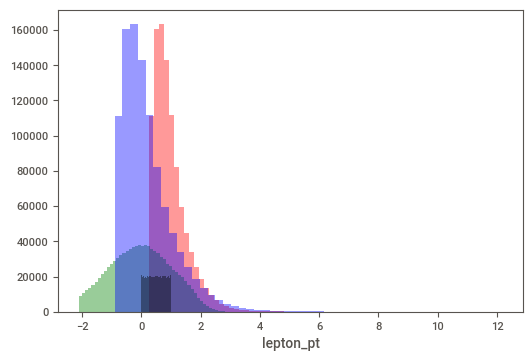

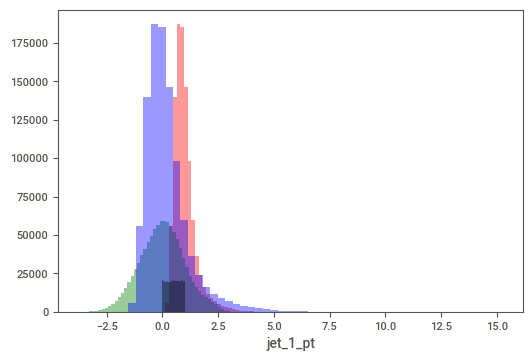

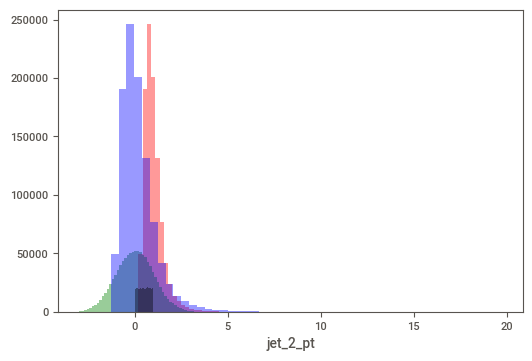

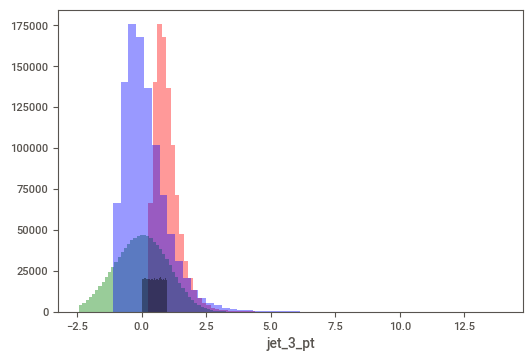

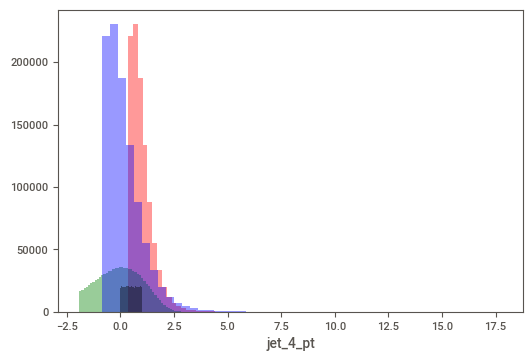

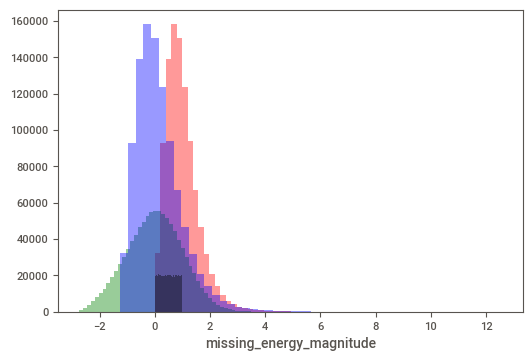

In [22]:

# Apply a PowerTransformer, RobustScaler and QuantileTransformer on the f_dist_columns. Display the results to determine which is more suitable.
f_dist_columns = ['lepton_pt', 'jet_1_pt', 'jet_2_pt', 'jet_3_pt', 'jet_4_pt', 'missing_energy_magnitude']
higgs_X_columns = higgs_X.columns

power_scaler = PowerTransformer()
higgs_X_power = higgs_X.copy()
higgs_X_power[f_dist_columns] = pd.DataFrame(power_scaler.fit_transform(higgs_X[f_dist_columns]), columns=f_dist_columns)

robust_scaler = RobustScaler()
higgs_X_robust = higgs_X.copy()
higgs_X_robust[f_dist_columns] = pd.DataFrame(robust_scaler.fit_transform(higgs_X[f_dist_columns]), columns=f_dist_columns)

quantile_scaler = QuantileTransformer()
higgs_X_quantile = higgs_X.copy()
higgs_X_quantile[f_dist_columns] = pd.DataFrame(quantile_scaler.fit_transform(higgs_X[f_dist_columns]), columns=f_dist_columns)

for col in f_dist_columns:
    plt.figure()
    sns.distplot(higgs_X[col], kde=False, bins=50, color='red')
    sns.distplot(higgs_X_power[col], kde=False, bins=50, color='green')
    sns.distplot(higgs_X_robust[col], kde=False, bins=50, color='blue')
    sns.distplot(higgs_X_quantile[col], kde=False, bins=50, color='black')


The `PowerTransformer` applies the transformation that changes the distribution of the skewed feature most similar to a normal distribution.

Next step is to apply a StandardScaler on all features.

In [23]:
# Apply StandardScaler on all features to align the range of the different features.
standard_scaler = StandardScaler()
higgs_X_standard = pd.DataFrame(standard_scaler.fit_transform(higgs_X_power), columns=higgs_X_power.columns)


In order to be able to transform measurements of new events, we need to persist the model of the `PowerTransformer` and `MinMaxScaler` as we'll need these later in the API to transform the input measurements.

Save the scalers and upload onto S3 to be used later in the prediction engine.

In [24]:
def save_model(model, filename):
    with open(filename, 'wb') as fh:
        joblib.dump(model, fh)

scalers = {
    'power': power_scaler,
    'minmax': standard_scaler
}

save_model(scalers, "../data/{}_scalers.pkl".format(NROWS))
!aws s3 cp ../data/scalers.pkl s3://sagemaker-eu-west-1-019518462631/capstone/


The user-provided path ../data/scalers.pkl does not exist.


### Splitting the data set

In [25]:
X_train, X_test, y_train, y_test = train_test_split(higgs_X_standard, higgs_y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print("Size of the training set: ", X_train.shape[0])
print("Size of the validation set: ", X_val.shape[0])
print("Size of the test set: ", X_test.shape[0])

Size of the training set:  700000
Size of the validation set:  150000
Size of the test set:  150000


### Write the preprocessed data

- to local file

In [26]:
def make_csv(x, y, filename, data_dir):
    """ Merges features and labels and converts them into one csv file with labels in the first column.
       :param x: Data features
       :param y: Data labels
       :param file_name: Name of csv file, ex. 'train.csv'
       :param data_dir: The directory where files will be saved
    """

    # make data dir, if it does not exist
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    
    full_filename = os.path.join(data_dir, filename)
    if y is not None:
        df = pd.concat([pd.DataFrame(y), pd.DataFrame(x)], axis=1)
    else:
        df = x
    df.to_csv(full_filename, header=False, index=False)
    
    # nothing is returned, but a print statement indicates that the function has run
    print('Path created: '+str(data_dir)+'/'+str(filename))

In [28]:
# Write data sets to local disk
make_csv(X_train, y_train, str(NROWS)+'_train.csv', data_dir)
make_csv(X_val, y_val, str(NROWS)+'_val.csv', data_dir)
make_csv(X_test, y_test, str(NROWS)+'_test.csv', data_dir)

Path created: ../data/1000000_train.csv
Path created: ../data/1000000_val.csv
Path created: ../data/1000000_test.csv


---